In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv('dt_analysis - cv.csv')
df.head()

,tree,dataset,language,splitting_criterion,rows,columns,k-fold,accuracy,generation_time
0,d1,heart failure prediction,r,gini,299,13,20,80.71,0.603
1,d2,heart failure prediction,r,gain ratio,299,13,20,82.05,0.064
2,d3,heart failure prediction,python,gini,299,13,20,73.77,0.065
3,d4,heart failure prediction,python,info gain,299,13,20,72.35,0.068
4,d5,heart failure prediction,java,gini,299,13,20,76.29,0.100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tree                 39 non-null     object 
 1   dataset              39 non-null     object 
 2   language             39 non-null     object 
 3   splitting_criterion  39 non-null     object 
 4   rows                 39 non-null     int64  
 5   columns              39 non-null     int64  
 6   k-fold               39 non-null     int64  
 7   accuracy             39 non-null     float64
 8   generation_time      39 non-null     float64
dtypes: float64(2), int64(3), object(4)
memory usage: 2.9+ KB


<AxesSubplot:xlabel='language'>

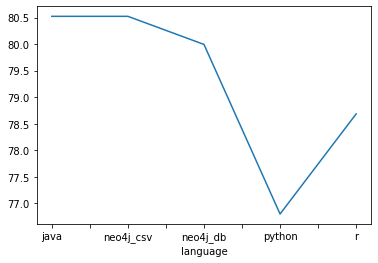

In [4]:
acc_df = df.groupby(['language']).mean()['accuracy']
acc_df.plot.line()

C:\Users\Nasim\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='language', ylabel='accuracy'>

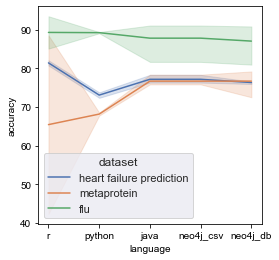

In [5]:
fig_dims = (4, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale=1)
sns.lineplot('language','accuracy',  data =df, hue='dataset', ax=ax)

C:\Users\Nasim\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='splitting_criterion', ylabel='accuracy'>

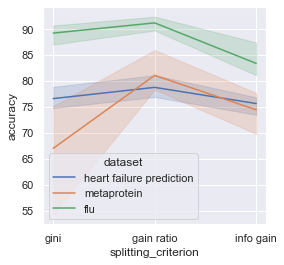

In [6]:
fig_dims = (4, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale=1)
sns.lineplot('splitting_criterion','accuracy',  data =df, hue='dataset', ax=ax)


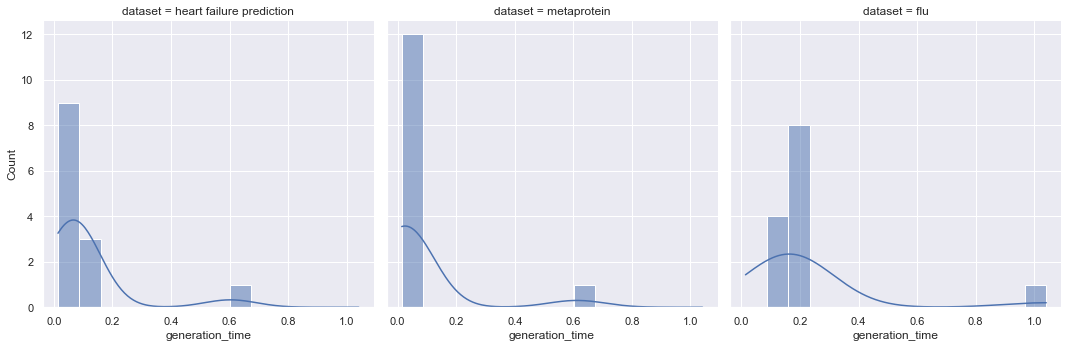

In [7]:
fig_dims = (8, 6)
sns.displot(data=df, x="generation_time",col= "dataset", kde=True)

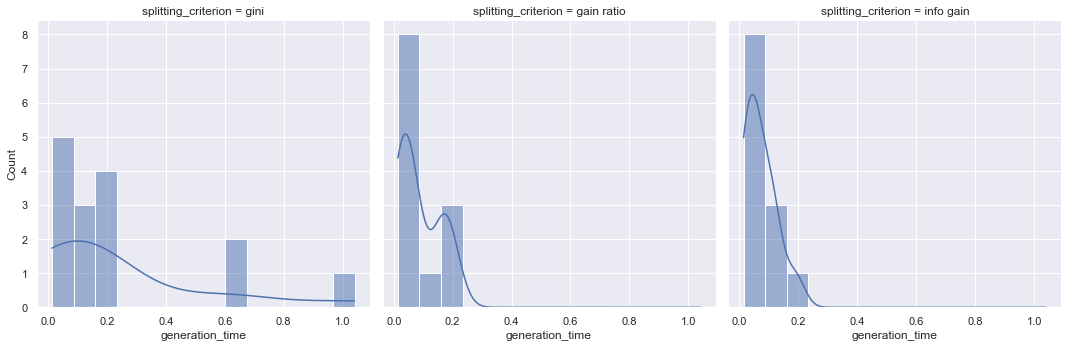

In [8]:
sns.displot(data=df, x="generation_time",col= "splitting_criterion", kde=True)

No handles with labels found to put in legend.
C:\Users\Nasim\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.
C:\Users\Nasim\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nasim\AppData\Local\Temp/ipykernel_16668/503390969.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show 

[Text(0.5, 0, '')]

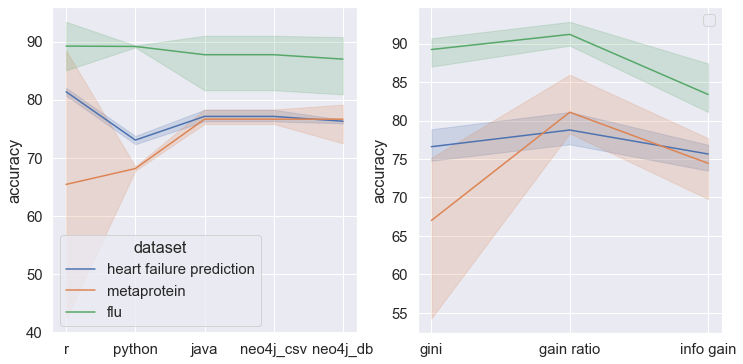

In [9]:
sns.set(font_scale=1.35)
fig_dims = (12, 6)
fig, ax =plt.subplots(1,2, figsize=fig_dims)
plt.legend(fontsize='x-large', title_fontsize='40')
#sns.countplot(df['batting'], ax=ax[0])
fig1=sns.lineplot('language','accuracy',  data =df, hue='dataset', ax=ax[0], legend=True)
plt.legend(loc='best')
#plt.setp(fig1.get_legend().get_texts(), fontsize='10') 

fig2 = sns.lineplot('splitting_criterion','accuracy',  data =df, hue='dataset', ax=ax[1], legend=False)
fig.show()
fig1.set(xlabel=None)
fig2.set(xlabel=None)

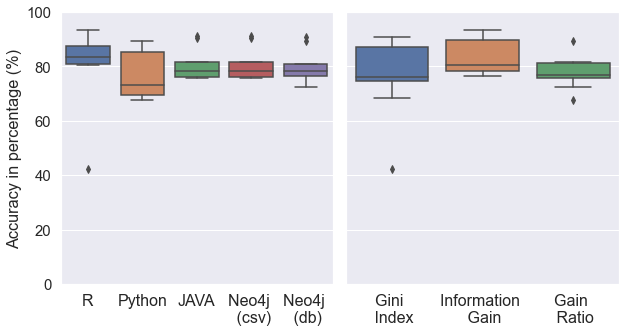

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

box1 = sns.boxplot(ax = axes[0], data=df, x="language", y="accuracy")
box2 = sns.boxplot(ax = axes[1], data=df, x="splitting_criterion", y="accuracy")


box1.set_xticklabels(['R','Python','JAVA', 'Neo4j \n (csv)', 'Neo4j \n (db)'])
box2.set_xticklabels(['Gini \n Index','Information \n Gain','Gain \n Ratio'])

box1.set(xlabel=None)
box2.set(xlabel=None)

box1.set(ylabel='Accuracy in percentage (%)')
box2.set(ylabel=None)

box1.set_xticklabels(box1.get_xticklabels(), size = 16)
box2.set_xticklabels(box2.get_xticklabels(), size = 16)


box1.set(ylim=(0, 100))
box2.set(ylim=(0, 100))



fig.subplots_adjust(wspace=0.05, hspace=0)


plt.savefig('accuracy_percentage.pdf', 
          dpi=300, bbox_inches='tight')

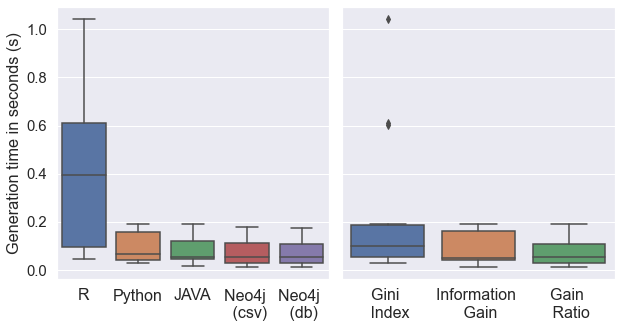

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

box4 = sns.boxplot(ax = axes[0], data=df, x="language", y="generation_time")
box5 = sns.boxplot(ax = axes[1], data=df, x="splitting_criterion", y="generation_time")

box4.set_xticklabels(['R','Python','JAVA', 'Neo4j \n (csv)', 'Neo4j \n (db)'])
box5.set_xticklabels(['Gini \n Index','Information \n Gain','Gain \n Ratio'])

box4.set(xlabel=None)
box5.set(xlabel=None)

box4.set(ylabel='Generation time in seconds (s)')
box5.set(ylabel=None)

box4.set_xticklabels(box4.get_xticklabels(), size = 16)
box5.set_xticklabels(box5.get_xticklabels(), size = 16)

fig.subplots_adjust(wspace=0.05, hspace=0)

plt.savefig('generation_time.pdf', 
          dpi=300, bbox_inches='tight')

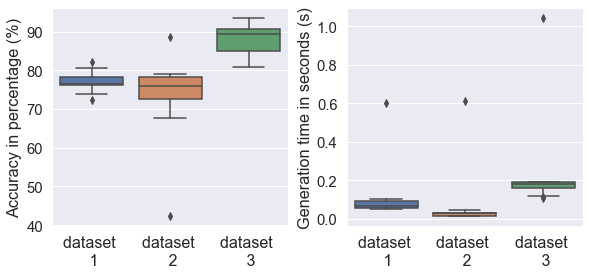

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(9.5, 4), sharey=False)

box3 = sns.boxplot(ax = axes[0], data=df, x="dataset", y="accuracy")
box6 = sns.boxplot(ax = axes[1], data=df, x="dataset", y="generation_time")
box3.set_xticklabels(['dataset \n 1','dataset \n 2','dataset \n 3'])
box6.set_xticklabels(['dataset \n 1','dataset \n 2','dataset \n 3'])

box3.set(xlabel=None)
box3.set(ylabel='Accuracy in percentage (%)')
box6.set(xlabel=None)
box6.set(ylabel='Generation time in seconds (s)')

box3.set_xticklabels(box3.get_xticklabels(), size = 16)
box6.set_xticklabels(box6.get_xticklabels(), size = 16)

fig.subplots_adjust(wspace=0.25, hspace=0)

plt.savefig('accuracy_dataset.pdf', 
          dpi=300, bbox_inches='tight')

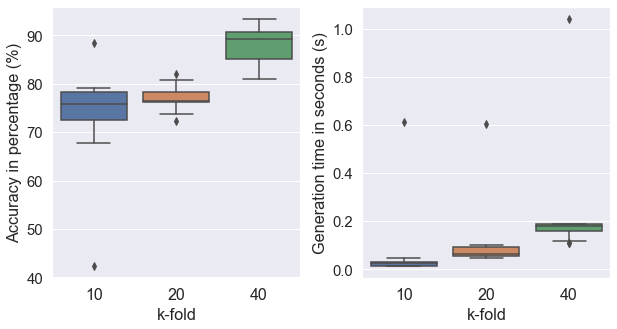

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=False)

bar1= sns.boxplot(ax = axes[0], data=df, x="k-fold", y="accuracy")
bar2= sns.boxplot(ax = axes[1],data=df, x="k-fold", y="generation_time")

plt.draw()
bar1.set(ylabel = 'Accuracy in percentage (%)')
bar2.set(ylabel = 'Generation time in seconds (s)')

bar1.set_xticklabels(bar1.get_xticklabels(), size = 16)
bar2.set_xticklabels(bar2.get_xticklabels(), size = 16)

fig.subplots_adjust(wspace=0.25, hspace=0)

plt.savefig('accuracy_kfold.pdf', 
          dpi=300, bbox_inches='tight')

In [14]:
sns.catplot(data=neo_df2, kind="violin", x="language", y="prediction_time")

NameError: name 'neo_df2' is not defined

In [ ]:
sns.catplot(data=neo_df2, kind="swarm", x="language", y="generation_time", hue="dataset", s = 15)

NameError: name 'neo_df2' is not defined

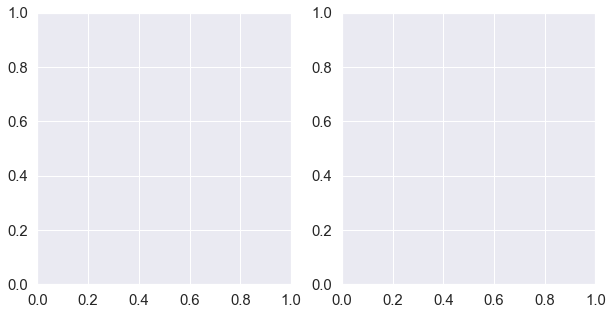

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

g = sns.swarmplot(data=neo_df2, x="language", y="accuracy", hue="dataset", ax = axes[0], s=15, dodge=True)

g.set_xticklabels(['Neo4j_CSV','Neo4j_DB'], size=16)
g.set(xlabel=None)
g.set(ylabel="Accuracy in percentage (%)")

g.legend().get_frame().set_linewidth(3.5)
handles, labels = g.get_legend_handles_labels()
g.legend(handles=handles[0:], labels=labels[0:])

h= sns.swarmplot(data=neo_df2, x="language", y="generation_time", hue="dataset",dodge=True, ax=axes[1], s=15)
legend = h.legend()
legend.remove()
h.set_xticklabels(['Neo4j_CSV','Neo4j_DB'], size=16)
h.set(xlabel=None)
h.set(ylabel=None)

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.2)

In [ ]:
sns.catplot(data=neo_df2, kind="swarm", x="language", y="prediction_time", hue="dataset", s = 15)

In [16]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

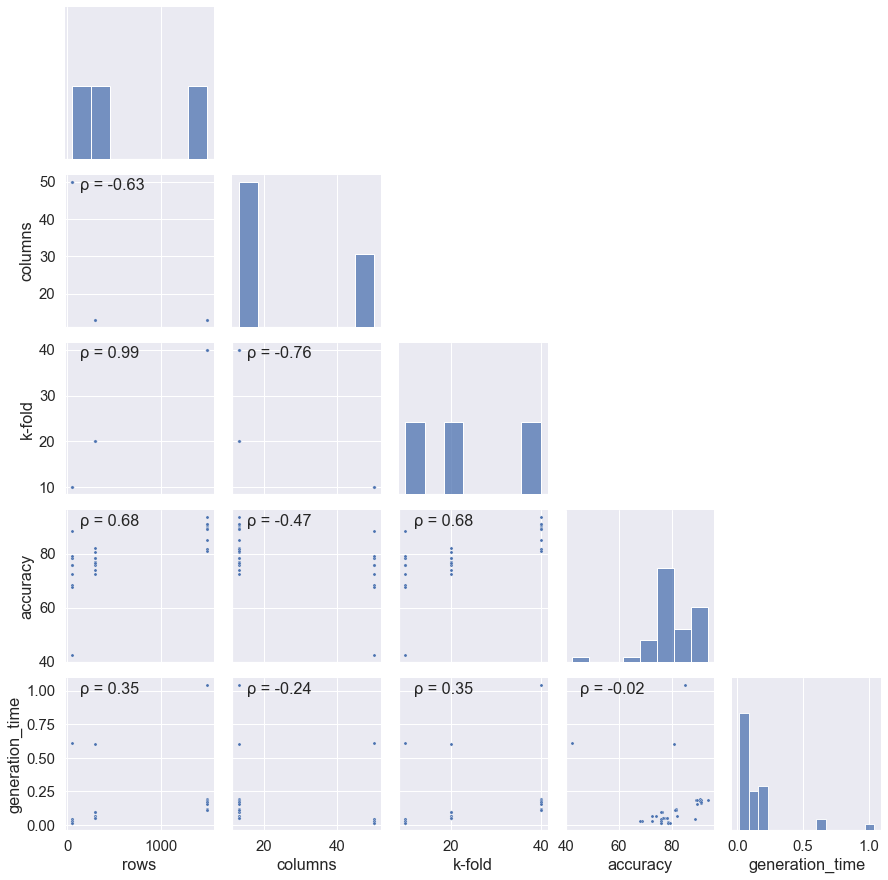

In [17]:
#sns.pairplot(data=df, hue="language", height=2.5)

g = sns.pairplot(df,corner=True,plot_kws={"s": 10})
g.map_lower(corrfunc)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\Users\Nasim\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


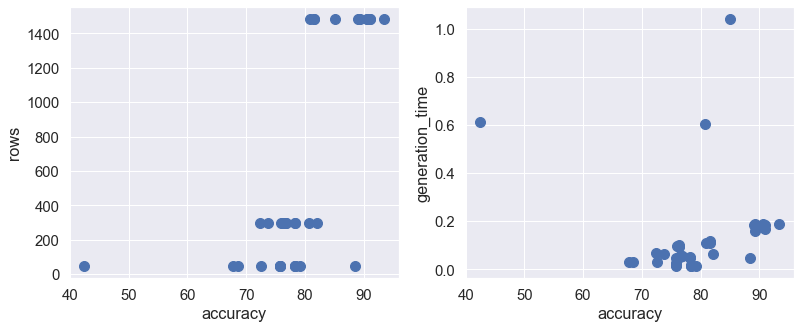

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

a = df.plot(kind='scatter', x='accuracy', y='rows', s=100, ax = axes[0])
b = df.plot(kind='scatter', x='accuracy', y='generation_time', s=100, ax=axes[1])